In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [12]:
cab = pd.read_csv('C:\DataSets-main\Cab_Data.csv')

In [13]:
customer = pd.read_csv('C:\DataSets-main\Customer_ID.csv')
city = pd.read_csv('C:\DataSets-main\City.csv')
transaction = pd.read_csv('C:\DataSets-main\Transaction_ID.csv')


In [14]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [15]:
cab.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,08-01-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,04-01-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,05-01-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,05-01-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,02-01-2018,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [16]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [17]:
customer.tail()

,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [18]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [19]:
transaction.tail()

,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


In [20]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [21]:
city.tail()

,City,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


In [22]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [23]:
cab['Date of Travel'] = pd.to_datetime(cab['Date of Travel'])

In [24]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [25]:
cab['Date of Travel']

0        2016-08-01
1        2016-06-01
2        2016-02-01
3        2016-07-01
4        2016-03-01
            ...    
359387   2018-08-01
359388   2018-04-01
359389   2018-05-01
359390   2018-05-01
359391   2018-02-01
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]

In [26]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [27]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [28]:
city.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [29]:
# Renaming the columns
for col in cab.columns:
    if " " in col:
        cab = cab.rename(columns={col:col.replace(" ", "_")})
for col in city.columns:
    if " " in col:
        city = city.rename(columns={col:col.replace(" ", "_")})
for col in customer.columns:
    if " " in col:
        customer = customer.rename(columns={col:col.replace(" ", "_")})
for col in transaction.columns:
    if " " in col:
        transaction = transaction.rename(columns={col:col.replace(" ", "_")})

In [30]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction_ID  359392 non-null  int64         
 1   Date_of_Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM_Travelled    359392 non-null  float64       
 5   Price_Charged   359392 non-null  float64       
 6   Cost_of_Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [31]:
cab.groupby("Date_of_Travel").Transaction_ID.count().head().sort_values(ascending=True)

Date_of_Travel
2016-01-02     99
2016-01-03    105
2016-01-06    140
2016-01-04    176
2016-01-05    424
Name: Transaction_ID, dtype: int64

In [32]:
months=[]
year=[]
day = []
day_of_the_week =[]

for i in range(len(cab["Date_of_Travel"])):
    months.append(cab["Date_of_Travel"][i].month)
    year.append(cab["Date_of_Travel"][i].year)
    day.append(cab["Date_of_Travel"][i].day)
    day_of_the_week.append(cab["Date_of_Travel"][i].weekday())
    #dy={0:"Mon",1:"Tue",2:"Wed" ,3:"Thur",4:"Fri",5:"Sat",6:"Sun"}
    #if day_of_the_week[i] in dy.keys():
    #    day_of_the_week[i] = dy[day_of_the_week[i]]
    
cab["Month"]= months
cab["Year"]=year
cab["Day"] = day
cab["Day_of_the_Week"] =day_of_the_week

In [34]:
cab.head(5)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Day,Day_of_the_Week
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,8,2016,1,0
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,6,2016,1,2
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2,2016,1,0
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,7,2016,1,4
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,3,2016,1,1


Text(0.5, 1.0, 'Week Analysis')

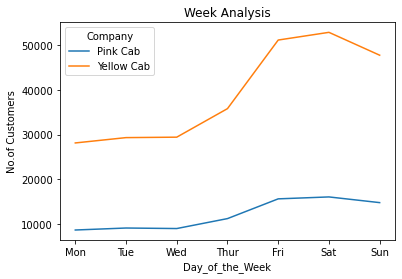

In [35]:

plotter = cab.groupby(["Day_of_the_Week","Company"]).Transaction_ID.count()
plotter.unstack().plot(kind="line")
plt.xticks(range(0,7),["Mon","Tue","Wed","Thur","Fri","Sat","Sun"])
plt.ylabel("No.of Customers")
plt.title("Week Analysis")

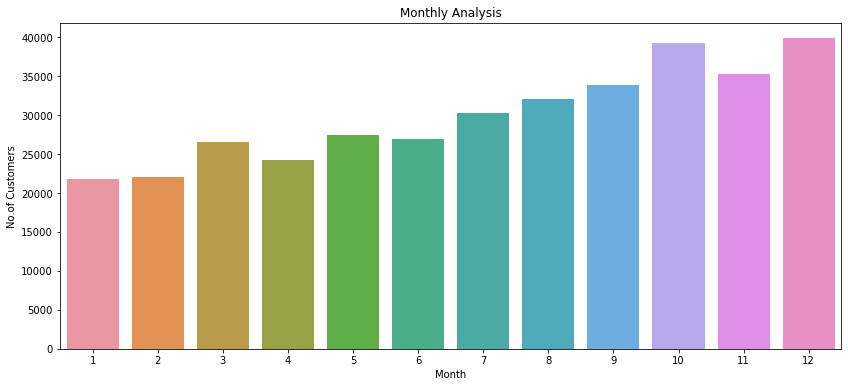

In [36]:
plot1=cab.groupby("Month").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title("Monthly Analysis")
plt.ylabel("No.of Customers")
plt.show()



Text(0.5, 1.0, 'Monthly Analysis per Company')

<Figure size 1008x432 with 0 Axes>

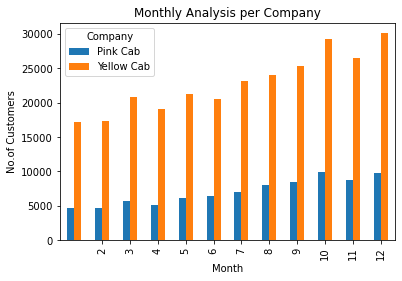

In [37]:
plotter = cab.groupby(["Month","Company"]).Transaction_ID.count()
plt.figure(figsize=(14,6))
plotter.unstack().plot(kind="bar")
plt.xticks(range(1,12))
plt.ylabel("No.of Customers")
plt.title("Monthly Analysis per Company")

In [38]:
cab.nunique

<bound method DataFrame.nunique of         Transaction_ID Date_of_Travel     Company           City  \
0             10000011     2016-08-01    Pink Cab     ATLANTA GA   
1             10000012     2016-06-01    Pink Cab     ATLANTA GA   
2             10000013     2016-02-01    Pink Cab     ATLANTA GA   
3             10000014     2016-07-01    Pink Cab     ATLANTA GA   
4             10000015     2016-03-01    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-08-01  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-04-01  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-05-01  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-05-01  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-02-01  Yellow Cab  WASHINGTON DC   

        KM_Travelled  Price_Charged  Cost_of_Trip  Month  Year  Day  \
0              30.45         370.95      313.6350      8  2016    1   
1     

Text(0.5, 1.0, 'Monthly Analysis per Company')

<Figure size 1440x720 with 0 Axes>

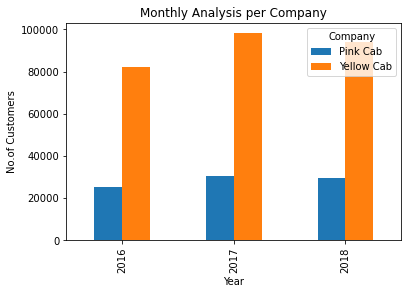

In [39]:
plotter = cab.groupby(["Year","Company"]).Transaction_ID.count()
plt.figure(figsize=(20,10))
plotter.unstack().plot(kind="bar")
plt.ylabel("No.of Customers")
plt.title("Monthly Analysis per Company")

Text(0, 0.5, 'Number Of Customers')

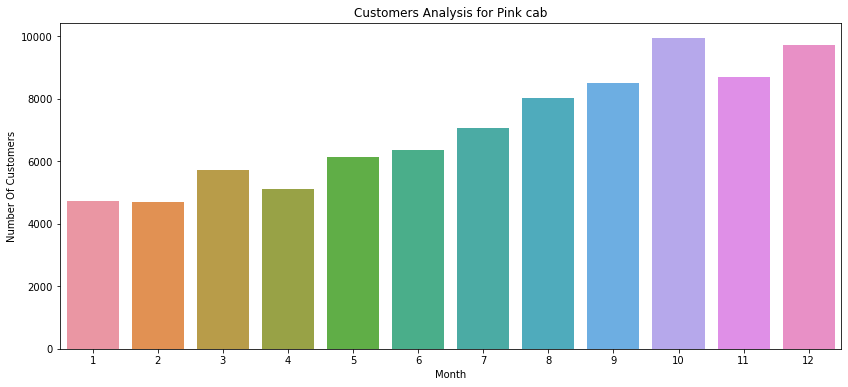

In [40]:
plot= cab[cab.Company == "Pink Cab"].groupby("Month").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot.index,y=plot.values)
plt.title("Customers Analysis for Pink cab")
plt.ylabel("Number Of Customers")

Text(0, 0.5, 'Number Of Customers')

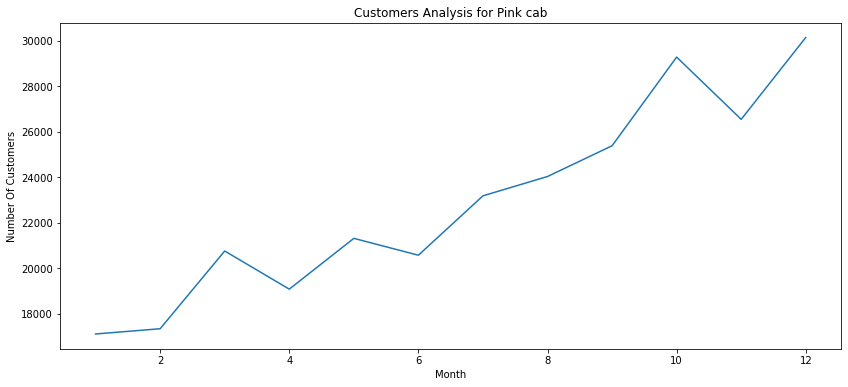

In [41]:
plot1= cab[cab.Company == "Yellow Cab"].groupby("Month").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.lineplot(x=plot1.index,y=plot1.values)
plt.title("Customers Analysis for Pink cab")
plt.ylabel("Number Of Customers")

Text(0.5, 1.0, 'Yearly Customer distribution')

<Figure size 7200x3600 with 0 Axes>

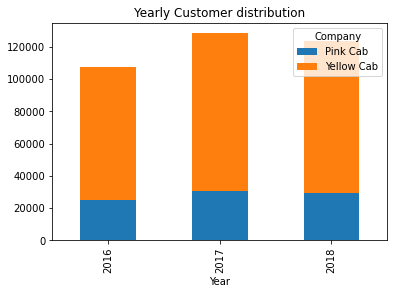

In [42]:
plot2 =cab.groupby(["Year","Company"]).Transaction_ID.count()
plt.figure(figsize=(100,50))
plot2.unstack().plot(kind="bar" ,stacked=True)
plt.title("Yearly Customer distribution")

Text(0, 0.5, 'Number Of Customers')

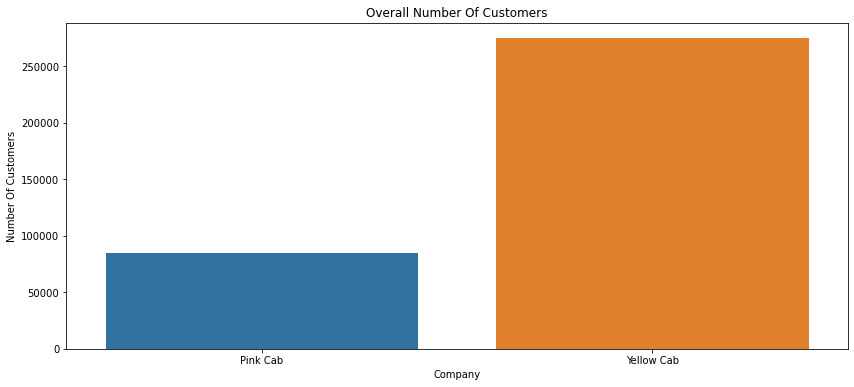

In [43]:
#Company Analysis

plot3=cab.groupby("Company").Transaction_ID.count()
plt.figure(figsize=(14,6))
sns.barplot(x=plot3.index,y=plot3.values)
plt.title("Overall Number Of Customers")
plt.ylabel("Number Of Customers")

In [44]:

plot4= cab[cab.Company=="Pink Cab"].groupby("Month").Transaction_ID.count()
plot4

Month
1     4734
2     4693
3     5724
4     5118
5     6150
6     6371
7     7048
8     8011
9     8518
10    9936
11    8679
12    9729
Name: Transaction_ID, dtype: int64

In [45]:
plot5= cab[cab.Company=="Yellow Cab"].groupby("Month").Transaction_ID.count()
plot5

Month
1     17108
2     17338
3     20754
4     19077
5     21309
6     20568
7     23177
8     24027
9     25377
10    29273
11    26538
12    30135
Name: Transaction_ID, dtype: int64

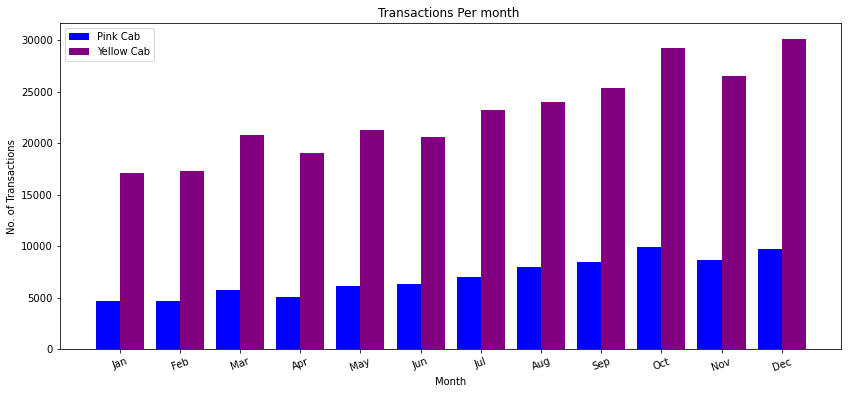

In [46]:
plt.figure(figsize=(14,6))
ax =plt.subplot(111)
ax.bar(plot4.index-0.2,plot4.values,width=0.4,color="Blue",align="center",label="Pink Cab")
ax.bar(plot5.index+0.2,plot5.values,width=0.4,color="Purple",align="center",label="Yellow Cab")
plt.title("Transactions Per month ")
plt.ylabel("No. of Transactions")
#locs, labels = plt.xticks()
plt.xticks(np.arange(1,13),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],rotation=20)
plt.xlabel("Month")
plt.legend()

In [47]:

cab[cab.Company=="Pink Cab"].groupby("Year").Price_Charged.mean()

Year
2016    315.330113
2017    315.907442
2018    301.642530
Name: Price_Charged, dtype: float64

In [48]:
cab[cab.Company=="Yellow Cab"].groupby("Year").Price_Charged.mean()

Year
2016    467.918301
2017    466.639950
2018    440.875558
Name: Price_Charged, dtype: float64

In [49]:
cab[cab.Company=="Pink Cab"].groupby("Year").Cost_of_Trip.mean()

Year
2016    247.008294
2017    248.836603
2018    248.412841
Name: Cost_of_Trip, dtype: float64

In [50]:
cab[cab.Company=="Yellow Cab"].groupby("Year").Cost_of_Trip.mean()

Year
2016    298.570481
2017    297.822893
2018    297.459436
Name: Cost_of_Trip, dtype: float64

In [51]:
data = pd.merge(cab, transaction)
data

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Day,Day_of_the_Week,Customer_ID,Payment_Mode
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,8,2016,1,0,29290,Card
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6,2016,1,2,27703,Card
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2,2016,1,0,28712,Cash
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,7,2016,1,4,28020,Cash
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,3,2016,1,1,27182,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-08-01,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,8,2018,1,2,52392,Cash
359388,10440104,2018-04-01,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,4,2018,1,6,53286,Cash
359389,10440105,2018-05-01,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,5,2018,1,1,52265,Cash
359390,10440106,2018-05-01,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,5,2018,1,1,52175,Card


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Transaction_ID   359392 non-null  int64         
 1   Date_of_Travel   359392 non-null  datetime64[ns]
 2   Company          359392 non-null  object        
 3   City             359392 non-null  object        
 4   KM_Travelled     359392 non-null  float64       
 5   Price_Charged    359392 non-null  float64       
 6   Cost_of_Trip     359392 non-null  float64       
 7   Month            359392 non-null  int64         
 8   Year             359392 non-null  int64         
 9   Day              359392 non-null  int64         
 10  Day_of_the_Week  359392 non-null  int64         
 11  Customer_ID      359392 non-null  int64         
 12  Payment_Mode     359392 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(6), object(3)
memory usage: 38.4+ 

In [53]:
data1 = pd.merge(data, customer)
data1

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Day,Day_of_the_Week,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,8,2016,1,0,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,21,5,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,23,4,29290,Card,Male,28,10813
3,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6,2016,1,2,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,21,5,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,2018-07-01,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,7,2018,1,6,38520,Card,Female,42,19417
359388,10439799,2018-03-01,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,3,2018,1,3,12490,Cash,Male,33,18713
359389,10439838,2018-04-01,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,4,2018,1,6,41414,Card,Male,38,3960
359390,10439840,2018-06-01,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,6,2018,1,4,41677,Cash,Male,23,19454


In [54]:
cities= data.groupby("City").Transaction_ID.count()
cities

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Transaction_ID, dtype: int64

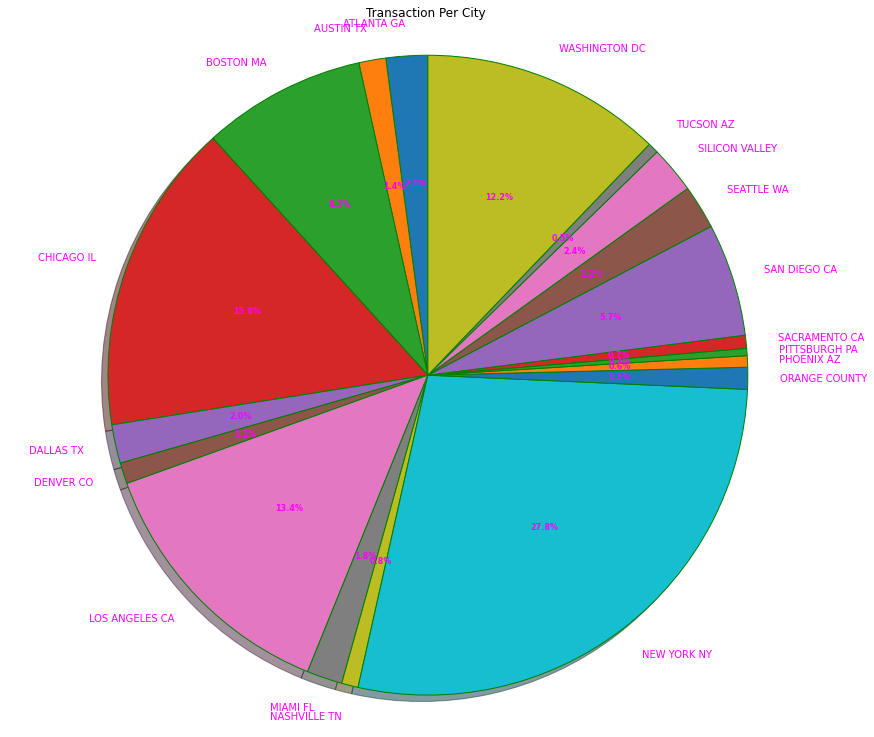

In [55]:
city = ['ATLANTA GA']
labs = cities.index
vals  = cities.values
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
figp , axs =plt.subplots(figsize=(15,13))
wedges, texts, autotexts = axs.pie(vals,labels=labs,autopct="%1.1f%%",startangle=90,shadow = True,wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
  
plt.setp(autotexts, size = 8, weight ="bold")
axs.axis('equal')
plt.title("Transaction Per City")
plt.show()

Text(0.5, 1.0, 'Payment mode per each company')

<Figure size 1440x1224 with 0 Axes>

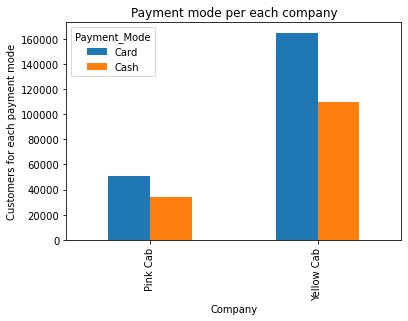

In [56]:

paymentplot = data.groupby(['Company','Payment_Mode']).Transaction_ID.count()
plt.figure(figsize=(20,17))
paymentplot.unstack().plot(kind="bar")
plt.ylabel("Customers for each payment mode")
plt.title("Payment mode per each company")

Text(0.5, 1.0, 'price charge mean per company')

<Figure size 1440x720 with 0 Axes>

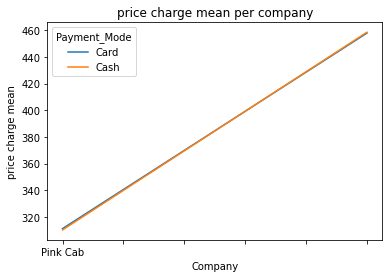

In [57]:
pricecharge = data.groupby(['Company','Payment_Mode']).Price_Charged.mean()
plt.figure(figsize=(20,10))
pricecharge.unstack().plot(kind="line")
plt.ylabel("price charge mean")
plt.title("price charge mean per company")


In [58]:
data1.groupby(["Gender","Company"]).Price_Charged.agg(["mean"])


mean
Gender Company               
Female Pink Cab    310.624823
       Yellow Cab  454.571538
Male   Pink Cab    310.940547
       Yellow Cab  460.821326

Text(0, 0.5, 'Number Of Customers')

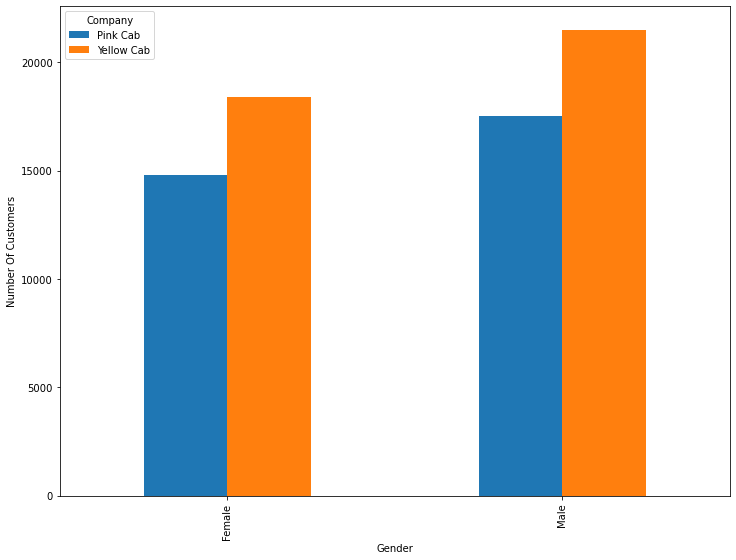

In [63]:
gen=data1.groupby(["Gender","Company"]).Customer_ID.nunique()
plt.rcParams['figure.figsize'] = [12, 9]
gen.unstack().plot(kind="bar")
plt.ylabel("Number Of Customers")



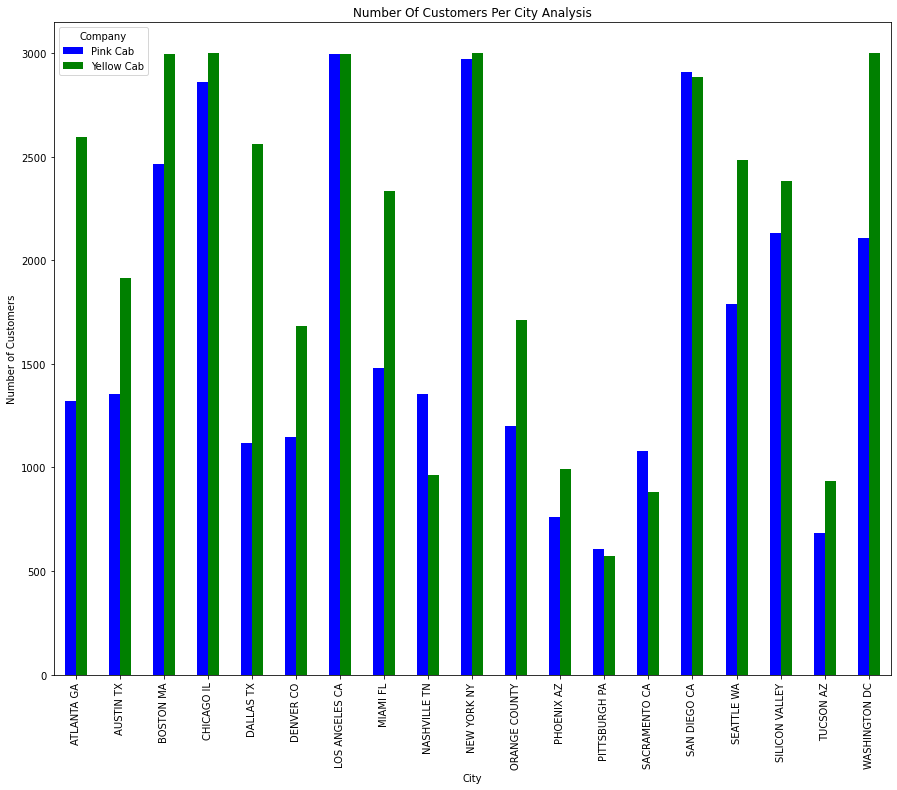

In [60]:
city_plot = data1.groupby(["City","Company"]).Customer_ID.nunique()
#plt.figure()
#plt.figure(figsize=(15,13))
plt.rcParams['figure.figsize'] = [15, 12]
city_plot.unstack().plot(kind="bar", color=["Blue","Green"])
plt.ylabel("Number of Customers")
plt.title("Number Of Customers Per City Analysis")
plt.show()

<AxesSubplot:xlabel='KM_Travelled', ylabel='Cost_of_Trip'>

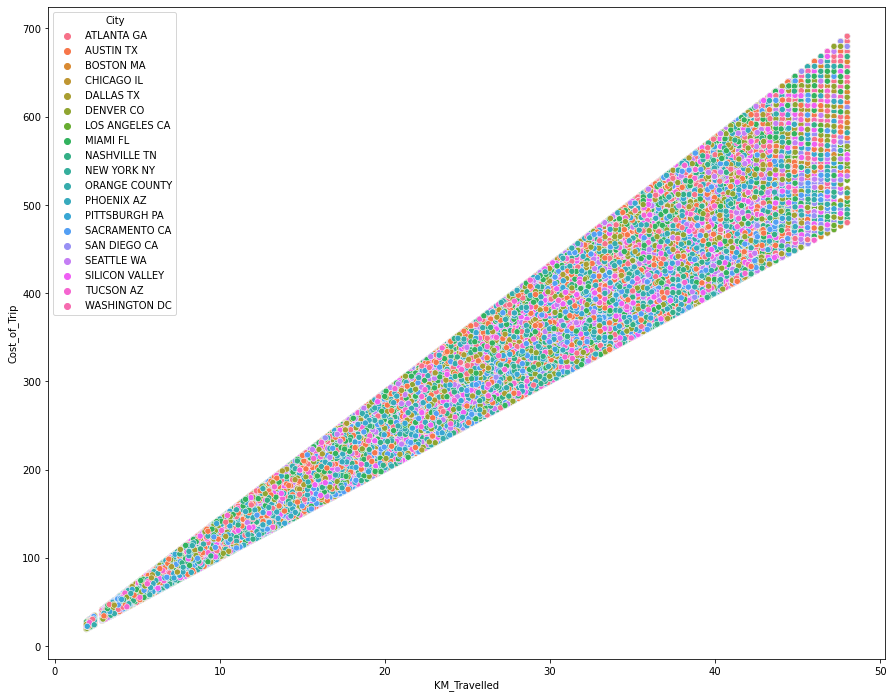

In [61]:
sns.scatterplot(data=data1,x="KM_Travelled",y="Cost_of_Trip",hue="City")

<AxesSubplot:xlabel='KM_Travelled', ylabel='Price_Charged'>

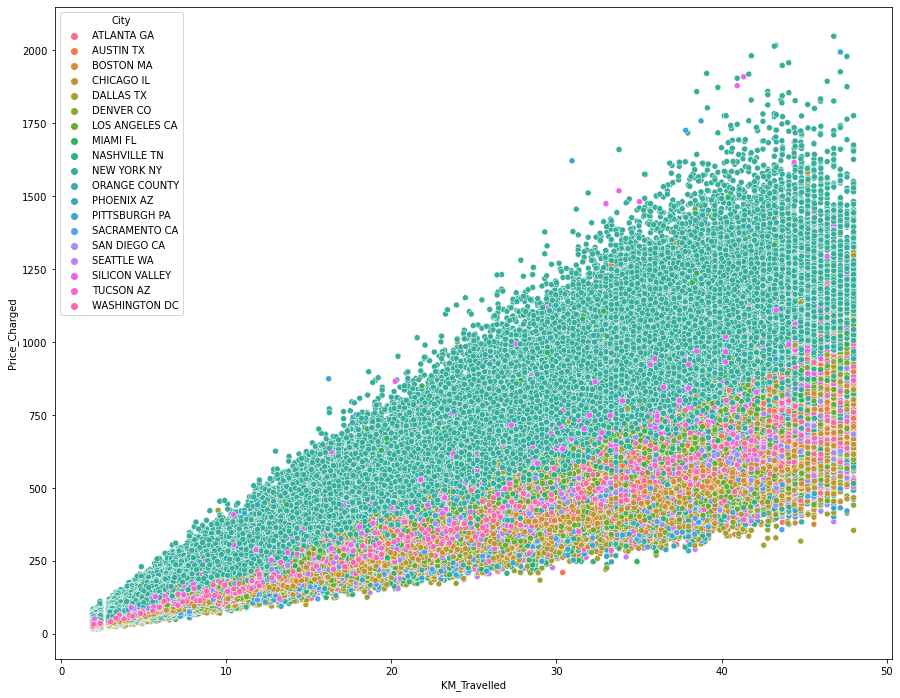

In [62]:
sns.scatterplot(data=data,x="KM_Travelled",y="Price_Charged",hue="City")

In [81]:
#Age Analysis

ageplot = data1.groupby(["Age"]).Customer_ID.nunique()
ageplot


Age
18    1450
19    1475
20    1535
21    1476
22    1499
23    1515
24    1442
25    1504
26    1485
27    1489
28    1500
29    1408
30    1457
31    1441
32    1492
33    1407
34    1548
35    1404
36    1433
37    1475
38    1417
39    1524
40    1456
41     491
42     493
43     498
44     458
45     524
46     508
47     503
48     502
49     502
50     509
51     496
52     497
53     479
54     479
55     468
56     490
57     462
58     502
59     517
60     473
61     550
62     462
63     481
64     505
65     467
Name: Customer_ID, dtype: int64

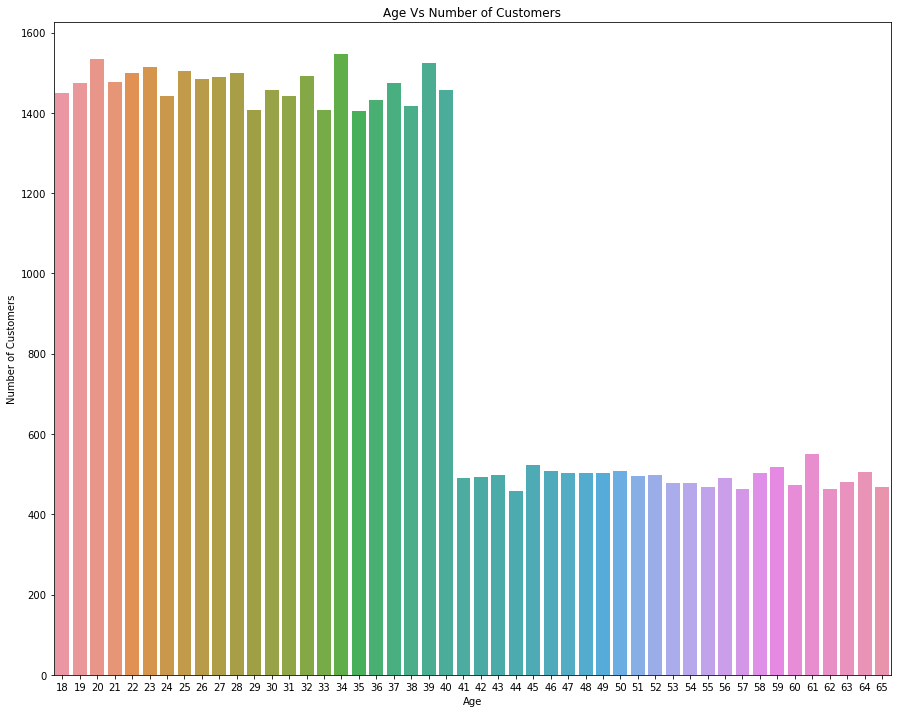

In [82]:
plt.rcParams['figure.figsize'] = [15, 12]
sns.barplot(x=ageplot.index,y=ageplot.values)
plt.title("Age Vs Number of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

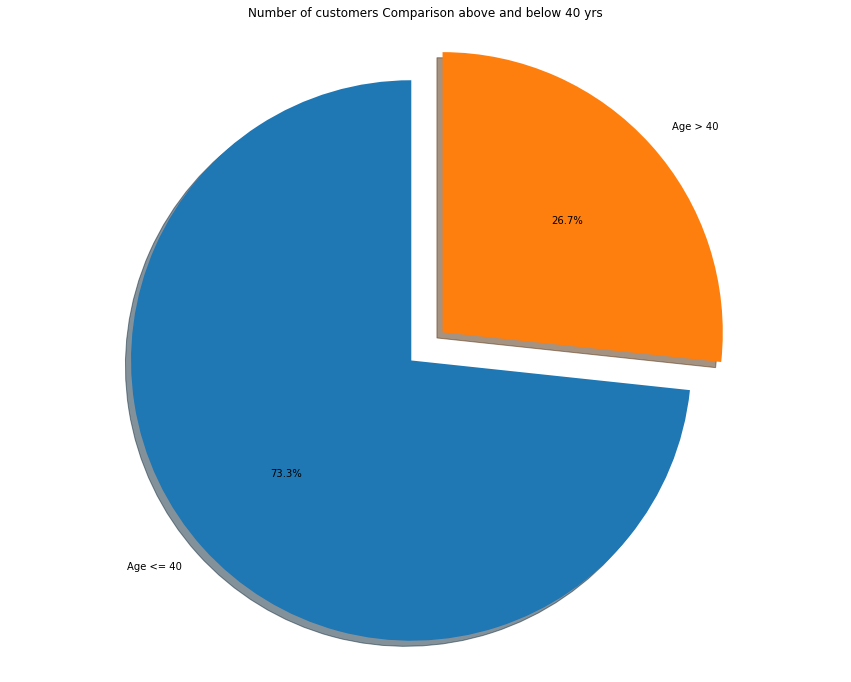

In [83]:
labels = ["Age <= 40","Age > 40"]
ages = [ageplot[ageplot.index <= 40].values.sum(),ageplot[ageplot.index > 40].values.sum()]
explode = [0.15,0]
fig,ax = plt.subplots()
ax.pie(ages , explode=explode  ,autopct="%1.1f%%" , labels=labels , shadow=True , startangle=90)
ax.axis("equal")
plt.title("Number of customers Comparison above and below 40 yrs")
plt.show()


In [84]:
company_age = data1.groupby(["Company","Age"]).Customer_ID.agg(["nunique"])
company_age = company_age.reset_index()
company_age

,Company,Age,nunique
0,Pink Cab,18,1028
1,Pink Cab,19,1062
2,Pink Cab,20,1072
3,Pink Cab,21,1016
4,Pink Cab,22,1041
...,...,...,...
91,Yellow Cab,61,477
92,Yellow Cab,62,397
93,Yellow Cab,63,411
94,Yellow Cab,64,425


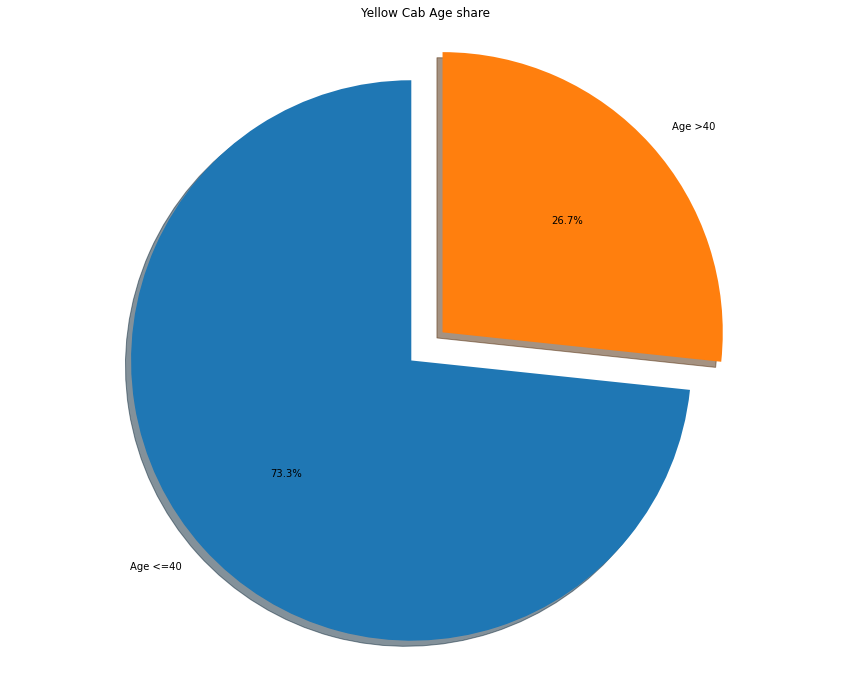

In [85]:
plt2 =[company_age[(company_age.Company=="Yellow Cab") & (company_age.Age <=40)]['nunique'].sum() 
       , company_age[(company_age.Company=="Yellow Cab") & (company_age.Age > 40)]['nunique'].sum()]
labels2=["Age <=40","Age >40"]
explode2 = [0.15,0]
fig2, ax2 = plt.subplots()
ax2.pie(plt2 , labels=labels2 , explode=explode2 , autopct = "%1.1f%%" , shadow=True , startangle=90)
plt.axis("equal")
plt.title("Yellow Cab Age share")
plt.show()

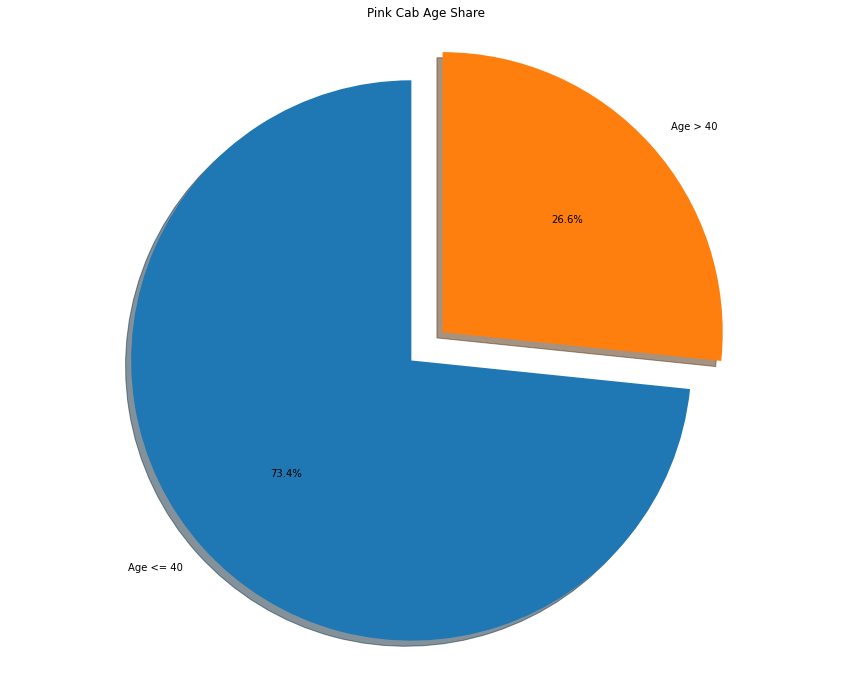

In [86]:
plt3 = [company_age[(company_age.Age <=40) & (company_age.Company == "Pink Cab")]['nunique'].sum() , 
        company_age[(company_age.Age >40) & (company_age.Company =="Pink Cab")]["nunique"].sum()]
labels3 = ["Age <= 40","Age > 40"]
explode3 =[0.15,0]
fig , ax = plt.subplots()
ax.pie(plt3 , labels=labels , explode=explode3 , shadow=True , autopct="%1.1f%%" , startangle=90)
plt.axis("equal")
plt.title("Pink Cab Age Share")
plt.show()


In [88]:
# Caluculating the kilometer travelled and price charged for all ages

data1[data1.Age <= 40]["KM_Travelled"].mean()



22.562932149670473

In [89]:
data1[data1.Age > 40]["KM_Travelled"].mean()

22.57906933737823

In [90]:
data1[data1.Age <= 40]["Price_Charged"].mean()

423.38327387150326

In [113]:
data1[data1.Age > 40]["Price_Charged"].mean()

423.60744072973785

In [116]:
data1[data1.Age >= 45].groupby(["Company"]).Price_Charged.mean()

Company
Pink Cab      309.453796
Yellow Cab    458.062624
Name: Price_Charged, dtype: float64

In [117]:
data1[data1.Age < 45].groupby(["Company"]).Price_Charged.mean()

Company
Pink Cab      311.192018
Yellow Cab    458.216657
Name: Price_Charged, dtype: float64

# Gender Analysis

In [95]:
gender = data1.groupby(["Company","Gender"]).Transaction_ID.agg(["count"])
gender

count
Company    Gender        
Pink Cab   Female   37480
           Male     47231
Yellow Cab Female  116000
           Male    158681

In [96]:
#Number of customers gender analysis
gender2 = data1.groupby(["Company","Gender"]).Customer_ID.agg(["nunique"])
gender2

nunique
Company    Gender         
Pink Cab   Female    14819
           Male      17511
Yellow Cab Female    18394
           Male      21502

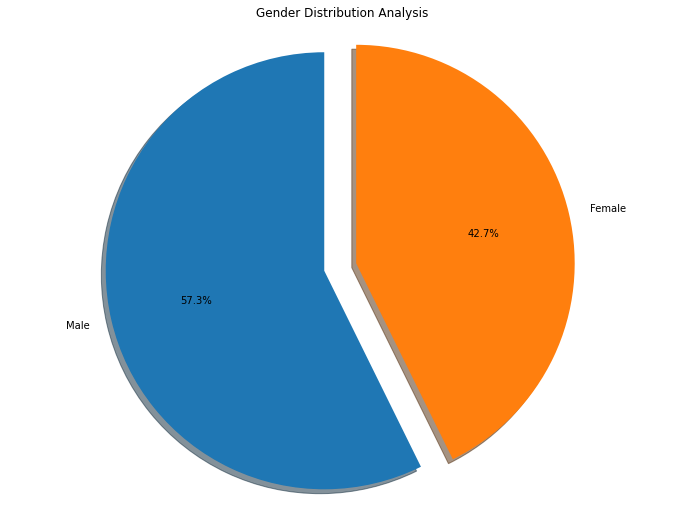

In [97]:
label4 = ["Male", "Female"]
pct4 =[data1[data1.Gender== "Male"]["Gender"].count() , data1[data1.Gender== "Female"]["Gender"].count()]
fig4 , ax4 = plt.subplots()
ax4.pie(pct4 , labels=label4 , autopct="%1.1f%%" , explode=(0.15,0) , shadow=True , startangle =90)
plt.axis("equal")
plt.title("Gender Distribution Analysis")
plt.show()

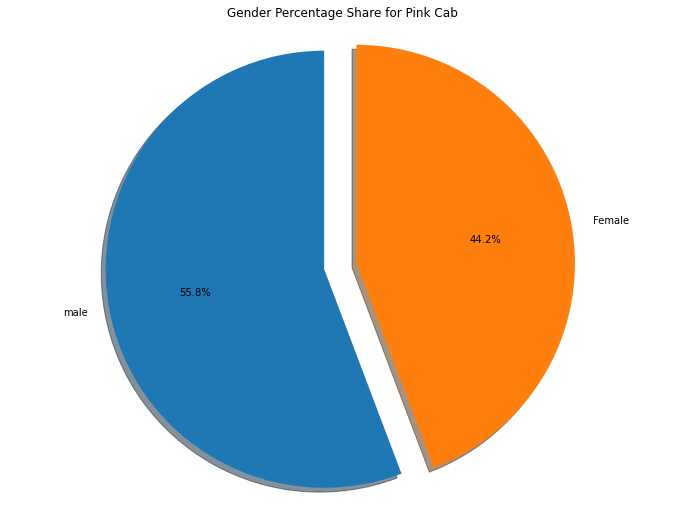

In [99]:
labels6 = ["male", "Female"]
pct5 = [data1[(data1.Gender == "Male") & (data1.Company=="Pink Cab")]["Gender"].count() , 
       data1[(data1.Gender == "Female") & (data1.Company=="Pink Cab")]["Gender"].count()]
fig , ax = plt.subplots()
ax.pie(pct5 , explode=(0.15,0) , autopct="%1.1f%%" ,labels=labels6 , shadow=True , startangle=90)
plt.axis("equal")
plt.title("Gender Percentage Share for Pink Cab")
plt.show()

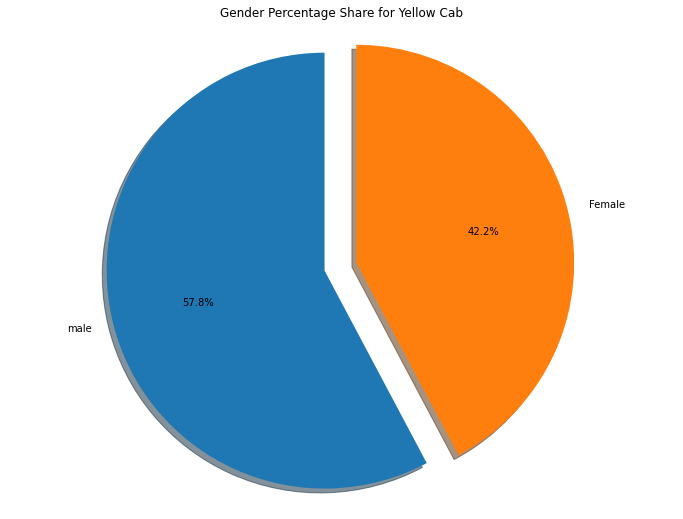

In [100]:
labels6 = ["male", "Female"]
pct5 = [data1[(data1.Gender == "Male") & (data1.Company=="Yellow Cab")]["Gender"].count() , 
       data1[(data1.Gender == "Female") & (data1.Company=="Yellow Cab")]["Gender"].count()]
fig , ax = plt.subplots()
ax.pie(pct5 , explode=(0.15,0) , autopct="%1.1f%%" ,labels=labels6 , shadow=True , startangle=90)
plt.axis("equal")
plt.title("Gender Percentage Share for Yellow Cab")
plt.show()

In [101]:
data1.groupby(['Company','Year','Gender']).Transaction_ID.count()

Company     Year  Gender
Pink Cab    2016  Female    10873
                  Male      14207
            2017  Female    13475
                  Male      16846
            2018  Female    13132
                  Male      16178
Yellow Cab  2016  Female    33861
                  Male      48378
            2017  Female    41785
                  Male      56404
            2018  Female    40354
                  Male      53899
Name: Transaction_ID, dtype: int64

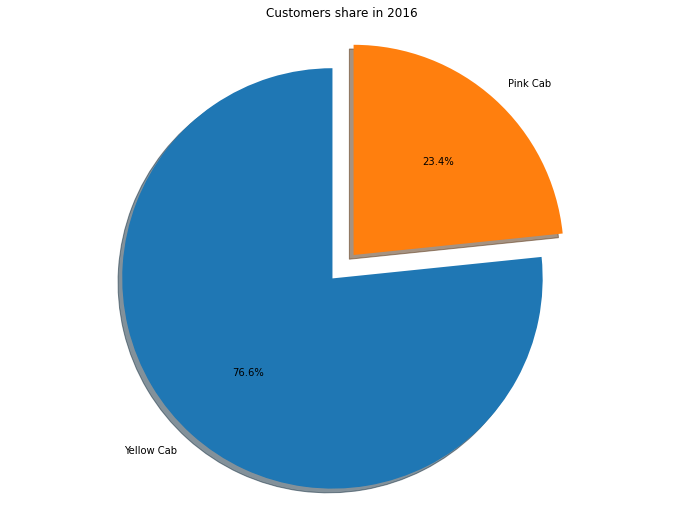

In [102]:
labels7 = 'Yellow Cab','Pink Cab' 
pct7 = [data1[(data1.Year==2016) & (data1.Company=='Yellow Cab')]['Customer_ID'].count(),data1[(data1.Year==2016) & (data1.Company=='Pink Cab')]['Customer_ID'].count() ]
fig7, ax7 = plt.subplots()
explode=(0.15,0)
ax7.pie(pct7 ,explode = explode, labels=labels7, autopct='%1.1f%%',shadow=True, startangle=90)
ax7.axis('equal')

plt.title('Customers share in 2016')
plt.show()

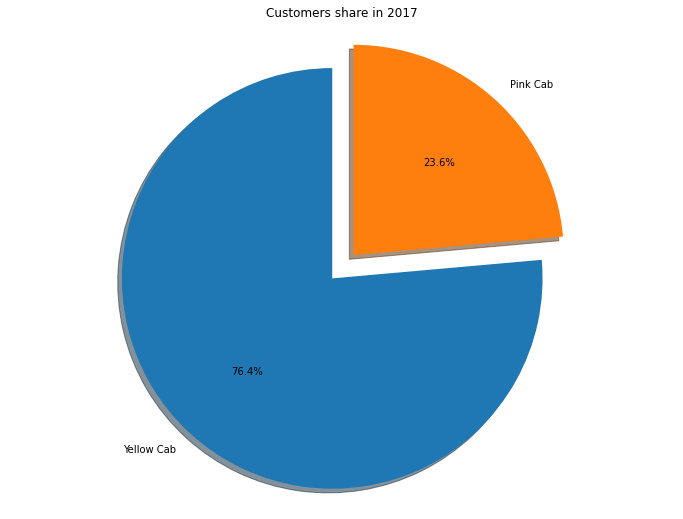

In [103]:
labels8 = 'Yellow Cab','Pink Cab' 
pct8 = [data1[(data1.Year==2017) & (data1.Company=='Yellow Cab')]['Customer_ID'].count(),data1[(data1.Year==2017) & (data1.Company=='Pink Cab')]['Customer_ID'].count() ]
fig8, ax8 = plt.subplots()
ax8.pie(pct8 ,explode = explode, labels=labels8, autopct='%1.1f%%',shadow=True, startangle=90)
ax8.axis('equal')

plt.title('Customers share in 2017')
plt.show()

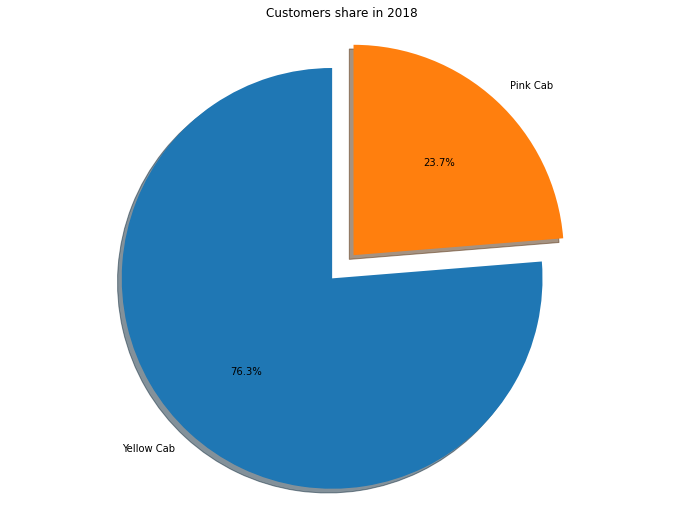

In [104]:
labels9 = 'Yellow Cab','Pink Cab' 
pct9 = [data1[(data1.Year==2018) & (data1.Company=='Yellow Cab')]['Customer_ID'].count(),data1[(data1.Year==2018) & (data1.Company=='Pink Cab')]['Customer_ID'].count() ]
fig9, ax9 = plt.subplots()
ax9.pie(pct9 ,explode = explode, labels=labels9, autopct='%1.1f%%',shadow=True, startangle=90)
ax9.axis('equal')

plt.title('Customers share in 2018')
plt.show()

# KM_Travelled Analysis

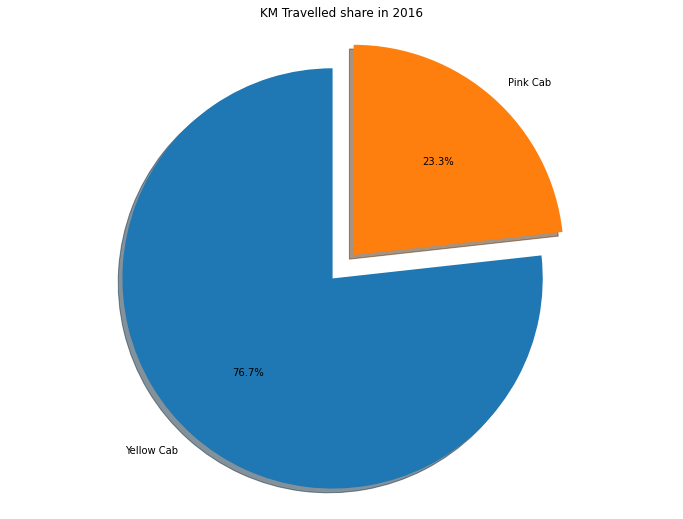

In [105]:
labels10 = 'Yellow Cab','Pink Cab' 
pct10 = [data1[(data1.Year==2016) & (data1.Company=='Yellow Cab')]['KM_Travelled'].sum(),data1[(data1.Year==2016) & (data1.Company=='Pink Cab')]['KM_Travelled'].sum() ]
fig10, ax10 = plt.subplots()
ax10.pie(pct10 ,explode = explode, labels=labels10, autopct='%1.1f%%',shadow=True, startangle=90)
ax10.axis('equal')

plt.title('KM Travelled share in 2016')
plt.show()

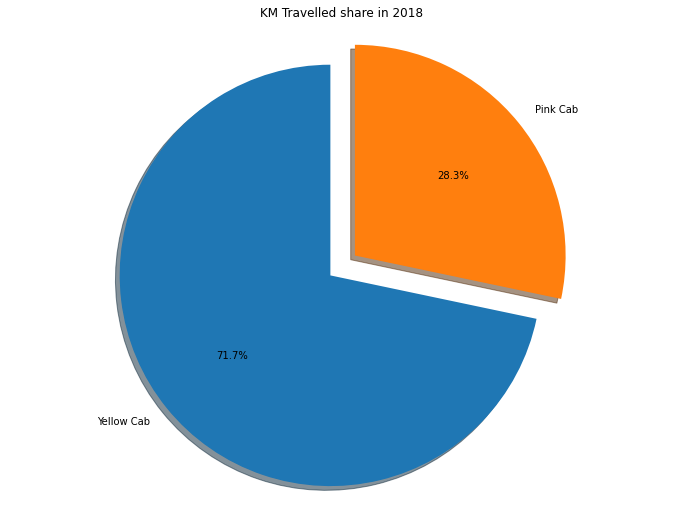

In [106]:
labels11 = 'Yellow Cab','Pink Cab' 
pct11 = [data1[(data1.Year==2018) & (data1.Company=='Yellow Cab')]['KM_Travelled'].sum(),data1[(data.Year==2018) & (data1.Company=='Pink Cab')]['KM_Travelled'].sum() ]
fig11, ax11 = plt.subplots()
ax11.pie(pct11 ,explode = explode, labels=labels11, autopct='%1.1f%%',shadow=True, startangle=90)
ax11.axis('equal')

plt.title('KM Travelled share in 2018')
plt.show()

In [107]:
data1["Margins"] = (data1["Price_Charged"]-data1["Cost_of_Trip"])

Text(0.5, 1.0, 'Margin distribution across the three Years')

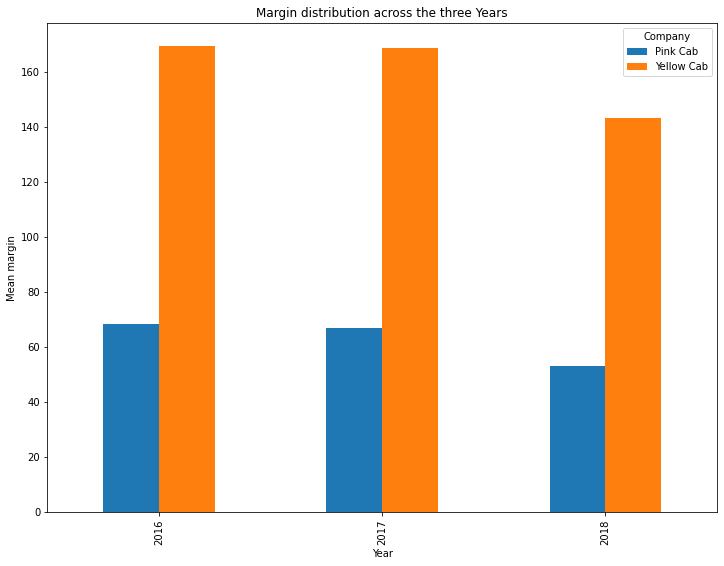

In [108]:
w=data1.groupby(["Year","Company"]).Margins.mean()
w.unstack().plot(kind="bar")
plt.ylabel("Mean margin")
plt.title("Margin distribution across the three Years")

In [110]:
df = data1[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Margins']]
df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Margins
KM_Travelled,1.000000,0.835753,0.981848,0.001033,-0.001072,-0.000369,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.036288,-0.036409,-0.003084,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.002720,-0.001773,-0.000189,0.486056
Month,0.001033,-0.036288,-0.002720,1.000000,-0.007440,-0.000095,-0.059428
Year,-0.001072,-0.036409,-0.001773,-0.007440,1.000000,-0.000579,-0.060567
Age,-0.000369,-0.003084,-0.000189,-0.000095,-0.000579,1.000000,-0.005093
Margins,0.462768,0.864154,0.486056,-0.059428,-0.060567,-0.005093,1.000000


<AxesSubplot:>

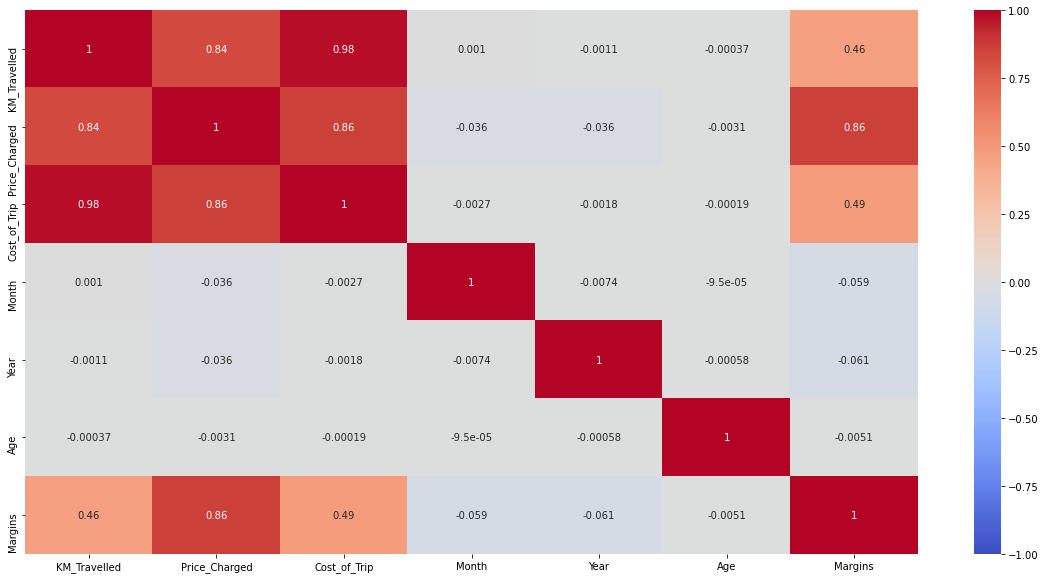

In [111]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr() , annot = True , vmin=-1 , vmax=1 , cmap ="coolwarm")

In [112]:
data1.groupby(["Gender","Company"]).Margins.mean()

Gender  Company   
Female  Pink Cab       62.180701
        Yellow Cab    156.305325
Male    Pink Cab       63.026310
        Yellow Cab    163.150948
Name: Margins, dtype: float64

# Hypothesis Testing

In [121]:
a= data1[(data1.Gender == "Female") & (data1.Company == "Yellow Cab") &
(data1.Year == 2016)].groupby(["Month"]).Transaction_ID.count()
b= data1[(data1.Gender == "Female") & (data1.Company == "Yellow Cab") &
(data1.Year == 2017)].groupby(["Month"]).Transaction_ID.count()
c= data1[(data1.Gender == "Female") & (data1.Company == "Yellow Cab") &
(data1.Year == 2018)].groupby(["Month"]).Transaction_ID.count()

_,p_value = stats.f_oneway(a.values , b.values , c.values)

if (p_value < 0.05):
    print("We accept alternative hypothesis that there is a statistical difference")
else:
    print("We accept the null hypothesis that there is no statistical difference")

print("The p value is:" ,p_value)

We accept alternative hypothesis that there is a statistical difference
The p value is: 0.04153364495280859


In [122]:
a = data1[(data1.Company=='Pink Cab')&(data1.Year==2016)].groupby('Month').Transaction_ID.count()
b = data1[(data1.Company=='Pink Cab')&(data1.Year==2017)].groupby('Month').Transaction_ID.count()
c = data1[(data1.Company=='Pink Cab')&(data1.Year==2018)].groupby('Month').Transaction_ID.count()


_, p_value = stats.f_oneway(a.values, b.values,c.values)
p_value
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.21996315930399932


In [123]:
a = data1[(data1.Payment_Mode=='Cash')&(data1.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data1[(data1.Payment_Mode=='Card')&(data1.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

We accept null hypothesis that theres no difference
P value is  0.7900465828793288


In [124]:
a = data1[(data1.Payment_Mode=='Cash')&(data1.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data1[(data1.Payment_Mode=='Card')&(data1.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.2933060638298729
